In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import pickle
import cv2
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
num_classes=124
X = X/255.0

y=np.array(y)

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\f

In [2]:
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


In [3]:
X.shape

(13219, 120, 120, 1)

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
X= X.reshape(X.shape[0], 30, 30, -1, 1)

In [6]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
X_val=X_tes[:1983]
X_val.shape
X_test=X_tes[1983:]

In [8]:
y_val=y_tes[:1983]
y_val.shape
y_test=y_tes[1983:]

In [9]:
## input layer
input_layer = Input((30, 30,16, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu')(conv_layer1)

## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
conv_layer4 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(conv_layer3)
pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer2 = BatchNormalization()(pooling_layer2)
flatten_layer = Flatten()(pooling_layer2)

## create an MLP architecture with dense layers : 4096 -> 512 -> 10
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=124, activation='softmax')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 30, 16, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 28, 28, 14, 8)     224       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 26, 26, 12, 16)    3472      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 13, 13, 6, 16)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 11, 11, 4, 32)     13856     
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 9, 9, 2, 64)       55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 4, 4, 1, 64)       0         
__________

In [11]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [12]:
#model 1
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy','sparse_top_k_categorical_accuracy'])
history=model.fit(X_train,y_train, batch_size=16, epochs=150, validation_data=(X_val, y_val) )

Instructions for updating:
Use tf.cast instead.
Train on 9253 samples, validate on 1983 samples
Epoch 1/150
9253/9253 [==============================] - 11s 1ms/step - loss: 4.8220 - acc: 0.0094 - sparse_top_k_categorical_accuracy: 0.0454 - val_loss: 4.8208 - val_acc: 0.0055 - val_sparse_top_k_categorical_accuracy: 0.0454
Epoch 2/150
9253/9253 [==============================] - 7s 717us/step - loss: 4.7710 - acc: 0.0176 - sparse_top_k_categorical_accuracy: 0.0712 - val_loss: 4.8845 - val_acc: 0.0111 - val_sparse_top_k_categorical_accuracy: 0.0454
Epoch 3/150
9253/9253 [==============================] - 7s 718us/step - loss: 4.5180 - acc: 0.0390 - sparse_top_k_categorical_accuracy: 0.1429 - val_loss: 4.4184 - val_acc: 0.0373 - val_sparse_top_k_categorical_accuracy: 0.1609
Epoch 4/150
9253/9253 [==============================] - 7s 720us/step - loss: 3.9523 - acc: 0.1034 - sparse_top_k_categorical_accuracy: 0.2991 - val_loss: 5.7020 - val_acc: 0.0530 - val_sparse_top_k_categorical_accura

9253/9253 [==============================] - 7s 720us/step - loss: 0.0518 - acc: 0.9839 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0854 - val_acc: 0.9733 - val_sparse_top_k_categorical_accuracy: 0.9980
Epoch 36/150
9253/9253 [==============================] - 7s 720us/step - loss: 0.0562 - acc: 0.9831 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_acc: 0.9597 - val_sparse_top_k_categorical_accuracy: 0.9980
Epoch 37/150
9253/9253 [==============================] - 7s 719us/step - loss: 0.0497 - acc: 0.9852 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1352 - val_acc: 0.9586 - val_sparse_top_k_categorical_accuracy: 0.9970
Epoch 38/150
9253/9253 [==============================] - 7s 721us/step - loss: 0.0552 - acc: 0.9830 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1367 - val_acc: 0.9571 - val_sparse_top_k_categorical_accuracy: 0.9965
Epoch 39/150
9253/9253 [==============================] - 7s 721us/step - loss: 0.0536 - acc:

Epoch 71/150
9253/9253 [==============================] - 7s 723us/step - loss: 0.0238 - acc: 0.9916 - sparse_top_k_categorical_accuracy: 0.9999 - val_loss: 0.0667 - val_acc: 0.9763 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 72/150
9253/9253 [==============================] - 7s 724us/step - loss: 0.0264 - acc: 0.9902 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1090 - val_acc: 0.9672 - val_sparse_top_k_categorical_accuracy: 0.9975
Epoch 73/150
9253/9253 [==============================] - 7s 726us/step - loss: 0.0258 - acc: 0.9904 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1236 - val_acc: 0.9592 - val_sparse_top_k_categorical_accuracy: 0.9965
Epoch 74/150
9253/9253 [==============================] - 7s 725us/step - loss: 0.0255 - acc: 0.9896 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0755 - val_acc: 0.9748 - val_sparse_top_k_categorical_accuracy: 0.9985
Epoch 75/150
9253/9253 [==============================] - 7s 726us/step - loss: 

9253/9253 [==============================] - 7s 723us/step - loss: 0.0191 - acc: 0.9921 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0703 - val_acc: 0.9753 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 107/150
9253/9253 [==============================] - 7s 726us/step - loss: 0.0196 - acc: 0.9922 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0679 - val_acc: 0.9773 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 108/150
9253/9253 [==============================] - 7s 724us/step - loss: 0.0196 - acc: 0.9912 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0856 - val_acc: 0.9708 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 109/150
9253/9253 [==============================] - 7s 723us/step - loss: 0.0185 - acc: 0.9920 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_acc: 0.9743 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 110/150
9253/9253 [==============================] - 7s 724us/step - loss: 0.0190 - 

9253/9253 [==============================] - 7s 724us/step - loss: 0.0141 - acc: 0.9924 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0686 - val_acc: 0.9768 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 142/150
9253/9253 [==============================] - 7s 725us/step - loss: 0.0169 - acc: 0.9921 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_acc: 0.9773 - val_sparse_top_k_categorical_accuracy: 0.9985
Epoch 143/150
9253/9253 [==============================] - 7s 724us/step - loss: 0.0159 - acc: 0.9924 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0873 - val_acc: 0.9733 - val_sparse_top_k_categorical_accuracy: 0.9985
Epoch 144/150
9253/9253 [==============================] - 7s 723us/step - loss: 0.0144 - acc: 0.9931 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_acc: 0.9783 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 145/150
9253/9253 [==============================] - 7s 724us/step - loss: 0.0159 - 

In [12]:
#model 2
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy','sparse_top_k_categorical_accuracy'])
history=model.fit(X_train,y_train, batch_size=32, epochs=150, validation_data=(X_val, y_val) )


Instructions for updating:
Use tf.cast instead.
Train on 9253 samples, validate on 1983 samples
Epoch 1/150
9253/9253 [==============================] - 10s 1ms/step - loss: 4.6796 - acc: 0.0327 - sparse_top_k_categorical_accuracy: 0.1142 - val_loss: 4.7234 - val_acc: 0.0323 - val_sparse_top_k_categorical_accuracy: 0.0978
Epoch 2/150
9253/9253 [==============================] - 5s 558us/step - loss: 3.9945 - acc: 0.1138 - sparse_top_k_categorical_accuracy: 0.3110 - val_loss: 3.6434 - val_acc: 0.1427 - val_sparse_top_k_categorical_accuracy: 0.4075
Epoch 3/150
9253/9253 [==============================] - 5s 559us/step - loss: 3.1674 - acc: 0.2319 - sparse_top_k_categorical_accuracy: 0.5376 - val_loss: 2.4745 - val_acc: 0.4165 - val_sparse_top_k_categorical_accuracy: 0.7569
Epoch 4/150
9253/9253 [==============================] - 5s 559us/step - loss: 2.4309 - acc: 0.3756 - sparse_top_k_categorical_accuracy: 0.7038 - val_loss: 1.7648 - val_acc: 0.6082 - val_sparse_top_k_categorical_accura

Epoch 71/150
9253/9253 [==============================] - 5s 557us/step - loss: 0.0224 - acc: 0.9904 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1203 - val_acc: 0.9733 - val_sparse_top_k_categorical_accuracy: 0.9980
Epoch 72/150
9253/9253 [==============================] - 5s 556us/step - loss: 0.0245 - acc: 0.9909 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_acc: 0.9672 - val_sparse_top_k_categorical_accuracy: 0.9980
Epoch 73/150
9253/9253 [==============================] - 5s 555us/step - loss: 0.0227 - acc: 0.9905 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1090 - val_acc: 0.9702 - val_sparse_top_k_categorical_accuracy: 0.9975
Epoch 74/150
9253/9253 [==============================] - 5s 556us/step - loss: 0.0226 - acc: 0.9904 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1475 - val_acc: 0.9597 - val_sparse_top_k_categorical_accuracy: 0.9970
Epoch 75/150
9253/9253 [==============================] - 5s 556us/step - loss: 

9253/9253 [==============================] - 5s 550us/step - loss: 0.0168 - acc: 0.9921 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1174 - val_acc: 0.9753 - val_sparse_top_k_categorical_accuracy: 0.9985
Epoch 142/150
9253/9253 [==============================] - 5s 550us/step - loss: 0.0170 - acc: 0.9918 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1177 - val_acc: 0.9718 - val_sparse_top_k_categorical_accuracy: 0.9980
Epoch 143/150
9253/9253 [==============================] - 5s 550us/step - loss: 0.0168 - acc: 0.9920 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1140 - val_acc: 0.9753 - val_sparse_top_k_categorical_accuracy: 0.9990
Epoch 144/150
9253/9253 [==============================] - 5s 550us/step - loss: 0.0176 - acc: 0.9923 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.1096 - val_acc: 0.9733 - val_sparse_top_k_categorical_accuracy: 0.9980
Epoch 145/150
9253/9253 [==============================] - 5s 550us/step - loss: 0.0172 - 

In [13]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_acc,val_sparse_top_k_categorical_accuracy,loss,acc,sparse_top_k_categorical_accuracy,epoch
145,0.063533,0.977307,0.998991,0.015334,0.992867,1.0,145
146,0.065490,0.979324,0.998487,0.014834,0.993083,1.0,146
147,0.071761,0.975290,0.998991,0.015745,0.992219,1.0,147
148,0.071966,0.975290,0.998991,0.015159,0.992219,1.0,148
149,0.068629,0.974786,0.998991,0.019177,0.991570,1.0,149


In [14]:
# Generate generalization metrics
score = model.evaluate( X_tes, y_tes, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.07355537263918865 / Test accuracy: 0.9737771054259227


In [15]:
y_pred = model.predict(X_tes)
y_pred  = y_pred.argmax(axis=-1)

In [16]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_tes, y_pred )
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.5f}\n'.format(accuracy_score(y_tes, y_pred)))

Confusion Matrix

[[32  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0  0 31]]

Accuracy: 0.97378



In [17]:
print('Micro Precision: {:.5f}'.format(precision_score(y_tes, y_pred, average='micro')))
print('Micro Recall: {:.5f}'.format(recall_score(y_tes, y_pred, average='micro')))
print('Micro F1-score: {:.5f}\n'.format(f1_score(y_tes, y_pred, average='micro')))

print('Macro Precision: {:.5f}'.format(precision_score(y_tes, y_pred, average='macro')))
print('Macro Recall: {:.5f}'.format(recall_score(y_tes, y_pred, average='macro')))
print('Macro F1-score: {:.5f}\n'.format(f1_score(y_tes, y_pred, average='macro')))

print('Weighted Precision: {:.5f}'.format(precision_score(y_tes, y_pred, average='weighted')))
print('Weighted Recall: {:.5f}'.format(recall_score(y_tes, y_pred, average='weighted')))
print('Weighted F1-score: {:.5f}'.format(f1_score(y_tes, y_pred, average='weighted')))

Micro Precision: 0.97378
Micro Recall: 0.97378
Micro F1-score: 0.97378

Macro Precision: 0.97369
Macro Recall: 0.97378
Macro F1-score: 0.97320

Weighted Precision: 0.97504
Weighted Recall: 0.97378
Weighted F1-score: 0.97387


In [18]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_tes, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.97      0.99        38
           2       0.97      0.94      0.96        36
           3       1.00      1.00      1.00        32
           4       0.93      0.96      0.94        26
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        38
           8       1.00      0.92      0.96        25
           9       1.00      1.00      1.00        37
          10       1.00      0.97      0.99        34
          11       1.00      1.00      1.00        30
          12       0.66      0.49      0.56        43
          13       0.42      0.59      0.49        29
          14       0.96      1.00      0.98        24
          15       1.00      1.00      1.00        29
          16       0.91      1.00      0.95        31
   

# CCR For Angle 0

In [19]:
pickle_in = open("X_0a.pickle","rb")
Xa = pickle.load(pickle_in)

pickle_in = open("y_0a.pickle","rb")
ya = pickle.load(pickle_in)
num_classes=124
Xa = Xa/255.0

y=np.array(y)

In [20]:
Xa.shape

(1207, 120, 120, 1)

In [21]:
Xa= Xa.reshape(Xa.shape[0], 30, 30, -1, 1)

In [22]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3, random_state=1)

In [23]:
# Generate generalization metrics
score0 = model.evaluate( Xa_test, ya_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.12795931738633107 / Test accuracy: 0.976802823553167


In [24]:
y_pred0 = model.predict(Xa_test)
y_pred0  = y_pred0.argmax(axis=-1)

In [25]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(ya_test, y_pred0 )
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ya_test, y_pred0)))

Confusion Matrix

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]

Accuracy: 0.96



In [26]:
print('Micro Precision: {:.2f}'.format(precision_score(ya_test, y_pred0, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(ya_test, y_pred0, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(ya_test, y_pred0, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(ya_test, y_pred0, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(ya_test, y_pred0, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(ya_test, y_pred0, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(ya_test, y_pred0, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(ya_test, y_pred0, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(ya_test, y_pred0, average='weighted')))

Micro Precision: 0.96
Micro Recall: 0.96
Micro F1-score: 0.96

Macro Precision: 0.96
Macro Recall: 0.97
Macro F1-score: 0.96

Weighted Precision: 0.97
Weighted Recall: 0.96
Weighted F1-score: 0.96


C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [27]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ya_test, y_pred0))


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      0.62      0.77         8
          12       1.00      0.25      0.40         4
          13       0.40      1.00      0.57         2
          14       1.00      1.00      1.00         6
          15       0.00      0.00      0.00         4
          16       0.56      1.00      0.71         5
          17       1.00      1.00      1.00         3
   

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# CCR For Angle 18

In [28]:
pickle_in = open("X_18a.pickle","rb")
X18 = pickle.load(pickle_in)

pickle_in = open("y_18a.pickle","rb")
y18 = pickle.load(pickle_in)
num_classes=124
X18 = X18/255.0

y18=np.array(y18)

In [29]:
X18= X18.reshape(X18.shape[0], 30, 30, -1, 1)

In [30]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X18_train, X18_test, y18_train, y18_test = train_test_split(X18, y18, test_size=0.3, random_state=1)

In [31]:
# Generate generalization metrics
score = model.evaluate( X18_test, y18_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.004058114788712077 / Test accuracy: 1.0


In [32]:
y_pred18 = model.predict( X18_test)
y_pred18 = y_pred18.argmax(axis=-1)

In [33]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y18_test,y_pred18)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


In [34]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y18_test, y_pred18)))


Accuracy: 1.00



# CCR For Angle 36

In [35]:
pickle_in = open("X_36a.pickle","rb")
X36 = pickle.load(pickle_in)

pickle_in = open("y_36a.pickle","rb")
y36 = pickle.load(pickle_in)
num_classes=124
X36 = X36/255.0

y36=np.array(y36)

In [36]:
X36= X36.reshape(X36.shape[0], 30, 30, -1, 1)

In [37]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X36_train, X36_test, y36_train, y36_test = train_test_split(X36, y36, test_size=0.3, random_state=1)

In [38]:
# Generate generalization metrics
score = model.evaluate( X36_test, y36_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.01636376516236886 / Test accuracy: 0.9917355371900827


In [39]:
y_pred36 = model.predict( X36_test)
y_pred36 = y_pred36.argmax(axis=-1)


In [40]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y36_test, y_pred36)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y36_test, y_pred36)))

Confusion Matrix

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]

Accuracy: 0.99



# CCR For Angle 54

In [41]:
pickle_in = open("X_54a.pickle","rb")
X54 = pickle.load(pickle_in)

pickle_in = open("y_54a.pickle","rb")
y54 = pickle.load(pickle_in)
num_classes=124
X54 = X54/255.0

y54=np.array(y54)

In [42]:
X54= X54.reshape(X54.shape[0], 30, 30, -1, 1)

In [43]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X54_train, X54_test, y54_train, y54_test = train_test_split(X54, y54, test_size=0.3, random_state=5)

In [44]:
# Generate generalization metrics
score = model.evaluate( X54_test, y54_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.047857657824125176 / Test accuracy: 0.9944598337950139


In [45]:
y_pred54 = model.predict( X54_test)
y_pred54 = y_pred54.argmax(axis=-1)


In [46]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y54_test, y_pred54)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y54_test, y_pred54)))

Confusion Matrix

[[5 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]

Accuracy: 0.99



# CCR For Angle 72

In [47]:
pickle_in = open("X_72a.pickle","rb")
X72 = pickle.load(pickle_in)

pickle_in = open("y_72a.pickle","rb")
y72 = pickle.load(pickle_in)
num_classes=124
X72 = X72/255.0

y72=np.array(y72)

In [48]:
X72= X72.reshape(X72.shape[0], 30, 30, -1, 1)

In [49]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X72_train, X72_test, y72_train, y72_test = train_test_split(X72, y72, test_size=0.3, random_state=1)

In [50]:
# Generate generalization metrics
score = model.evaluate( X72_test, y72_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.02338896364947313 / Test accuracy: 0.9944903581267218


In [51]:
y_pred72 = model.predict( X72_test)
y_pred72 = y_pred72.argmax(axis=-1)

In [52]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y72_test,y_pred72)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y72_test,y_pred72)))

Confusion Matrix

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 2]]

Accuracy: 0.99



# CCR For Angle 90

In [53]:
pickle_in = open("X_90a.pickle","rb")
X90 = pickle.load(pickle_in)

pickle_in = open("y_90a.pickle","rb")
y90 = pickle.load(pickle_in)
num_classes=124
X90 = X90/255.0

y90=np.array(y90)

In [54]:
X90= X90.reshape(X90.shape[0], 30, 30, -1, 1)

In [55]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X90_train, X90_test, y90_train, y90_test = train_test_split(X90, y90, test_size=0.3,random_state=2)

In [56]:
# Generate generalization metrics
score = model.evaluate( X90_test, y90_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.07911341942630962 / Test accuracy: 0.9862258953168044


In [57]:
y_pred90 = model.predict( X90_test)
y_pred90 = y_pred90.argmax(axis=-1)


In [58]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y90_test, y_pred90)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y90_test, y_pred90)))

Confusion Matrix

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]

Accuracy: 0.99



# CCR For Angle 108

In [59]:
pickle_in = open("X_108a.pickle","rb")
X108 = pickle.load(pickle_in)

pickle_in = open("y_108a.pickle","rb")
y108= pickle.load(pickle_in)
num_classes=124
X108 = X108/255.0

y108=np.array(y108)

In [60]:
X108= X108.reshape(X108.shape[0], 30, 30, -1, 1)

In [61]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X108_train, X108_test, y108_train, y108_test = train_test_split(X108, y108, test_size=0.3, random_state=2)

In [62]:
# Generate generalization metrics
score = model.evaluate( X108_test, y108_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5002295376403575 / Test accuracy: 0.9539295396184534


In [63]:
y_pred108 = model.predict( X108_test)
y_pred108 = y_pred108.argmax(axis=-1)


In [64]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y108_test, y_pred108)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y108_test, y_pred108)))

Confusion Matrix

[[3 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]

Accuracy: 0.95



# CCR For Angle 126

In [65]:
pickle_in = open("X_126a.pickle","rb")
X126 = pickle.load(pickle_in)

pickle_in = open("y_126a.pickle","rb")
y126= pickle.load(pickle_in)
num_classes=124
X126 = X126/255.0

y126=np.array(y126)

In [66]:
X126= X126.reshape(X126.shape[0], 30, 30, -1, 1)

In [67]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X126_train, X126_test, y126_train, y126_test = train_test_split(X126, y126, test_size=0.3, random_state=2)

In [68]:
# Generate generalization metrics
score = model.evaluate( X126_test, y126_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.017074565112691037 / Test accuracy: 0.9916666666666667


In [69]:
y_pred126 = model.predict( X126_test)
y_pred126 = y_pred126.argmax(axis=-1)


In [70]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y126_test, y_pred126)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y126_test, y_pred126)))

Confusion Matrix

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]

Accuracy: 0.99



# CCR For Angle 144

In [71]:
pickle_in = open("X_144a.pickle","rb")
X144 = pickle.load(pickle_in)

pickle_in = open("y_144a.pickle","rb")
y144= pickle.load(pickle_in)
num_classes=124
X144 = X144/255.0

y144=np.array(y144)

In [72]:
X144= X144.reshape(X144.shape[0], 30, 30, -1, 1)

In [73]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X144_train, X144_test, y144_train, y144_test = train_test_split(X144, y144, test_size=0.3, random_state=2)

In [74]:
# Generate generalization metrics
score = model.evaluate( X144_test, y144_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.1007831640367739 / Test accuracy: 0.9888888888888889


In [75]:
y_pred144 = model.predict( X144_test)
y_pred144 = y_pred144.argmax(axis=-1)

In [76]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y144_test, y_pred144 )
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y144_test, y_pred144)))

Confusion Matrix

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]

Accuracy: 0.99



# CCR For Angle 162

In [77]:
pickle_in = open("X_162a.pickle","rb")
X162 = pickle.load(pickle_in)

pickle_in = open("y_162a.pickle","rb")
y162= pickle.load(pickle_in)
num_classes=124
X162 = X162/255.0

y162=np.array(y162)

In [78]:
X162= X162.reshape(X162.shape[0], 30, 30, -1, 1)

In [79]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X162_train, X162_test, y162_train, y162_test = train_test_split(X162, y162, test_size=0.3, random_state=2)

In [80]:
# Generate generalization metrics
score = model.evaluate( X162_test, y162_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.012520021697676704 / Test accuracy: 0.9916201117318436


In [81]:
y_pred = model.predict( X18_test)
y_classes = y_pred.argmax(axis=-1)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y18_test, y_classes)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y18_test, y_classes)))

Confusion Matrix

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]

Accuracy: 1.00



# CCR For Angle 180

In [82]:
pickle_in = open("X_180a.pickle","rb")
X180 = pickle.load(pickle_in)

pickle_in = open("y_180a.pickle","rb")
y180= pickle.load(pickle_in)
num_classes=124
X180 = X180/255.0

y180=np.array(y180)

In [83]:
X180= X180.reshape(X180.shape[0], 30, 30, -1, 1)

In [84]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X180_train, X180_test, y180_train, y180_test = train_test_split(X180, y180, test_size=0.3, random_state=1)

In [85]:
# Generate generalization metrics
score = model.evaluate( X180_test, y180_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.2506715303101033 / Test accuracy: 0.9697802197802198


In [86]:
y_pred180 = model.predict( X180_test)
y_pred180 = y_pred180.argmax(axis=-1)

In [87]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y180_test, y_pred180)
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y180_test, y_pred180)))

Confusion Matrix

[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]

Accuracy: 0.97



# Learning Curves Visualization

In [88]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [89]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

In [90]:
def plot_acc(history, title):
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['acc'], label='Train')
    plt.plot(history.history['val_acc'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()
    
    val_acc = history.history['val_acc']
    max_idx = np.argmax(val_acc)
    max_val_acc = val_acc[max_idx]
    print('Maximum validation Acc of {} reached at epoch {}'.format(max_val_acc*100, max_idx))

In [91]:
def plot_accall(history):
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['acc'], label='Rank-1 Train')
    plt.plot(history.history['val_acc'], label='Rank-1 Validation')
    plt.plot(history.history['sparse_top_k_categorical_accuracy'], label='Rank-5 Train')
    plt.plot(history.history['val_sparse_top_k_categorical_accuracy'], label='Rank-5 Validation')
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()

In [92]:
def plot_kacc(history, title):
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['sparse_top_k_categorical_accuracy'], label='Train')
    plt.plot(history.history['val_sparse_top_k_categorical_accuracy'], label='Validation')
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()
    


<Figure size 720x432 with 0 Axes>

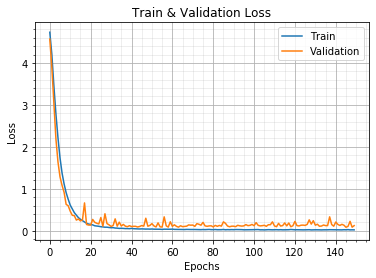

Minimum validation loss of 0.08292869147380537 reached at epoch 145


In [93]:
plot_loss(history, 'Train & Validation Loss')

<Figure size 720x432 with 0 Axes>

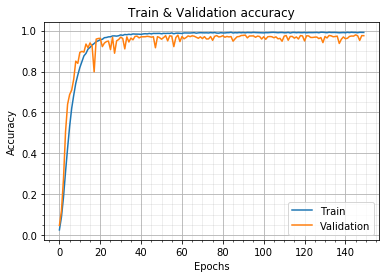

Maximum validation Acc of 97.93242562075667 reached at epoch 145


In [94]:
plot_acc(history, 'Train & Validation accuracy')

<Figure size 720x360 with 0 Axes>

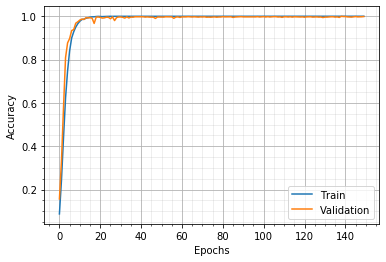

In [95]:
plot_kacc(history, 'Train & Validation sparse_top_k_categorical_accuracy')

<Figure size 720x432 with 0 Axes>

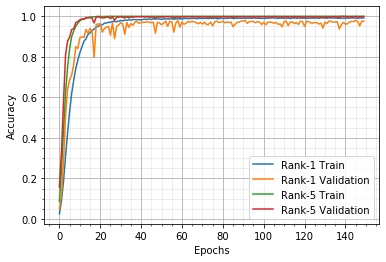

In [96]:
plot_accall(history)

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)